**Q1 Read an image and display the grayscale version of it.**


In [ ]:
from skimage import color
from skimage import io
from PIL import Image


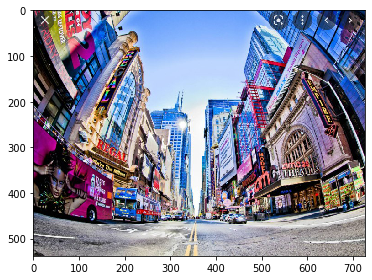

In [ ]:
img = io.imread("/content/DIP1.jpg",0)
io.imshow(img)



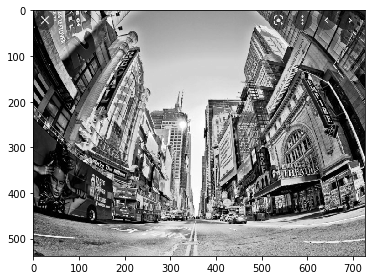

In [ ]:
img = io.imread("/content/DIP1.jpg",1)
io.imshow(img)

Inference: In digital images, grayscale means that the value of each pixel represents only the intensity information of the light.

**Q2 Vary the intensity resolution of the grayscale image from 8 bits to 4 bits, 2 bits, and 1 bit, and display the corresponding images.**

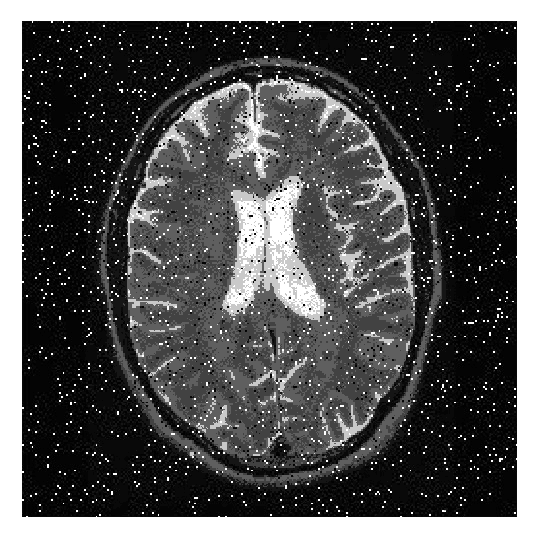

In [ ]:
img_G= Image.open('/content/1*2I9jCD3ZuQd-SUhC21ra8Q.jpeg')
im_q = img_G.quantize(8)
im_q

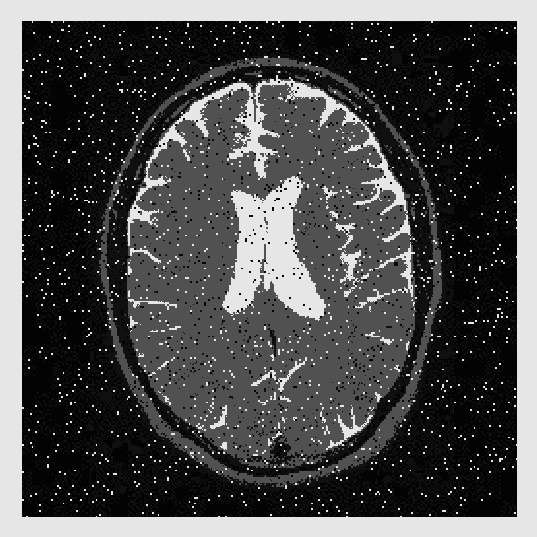

In [ ]:
im_q = img_G.quantize(4)
im_q

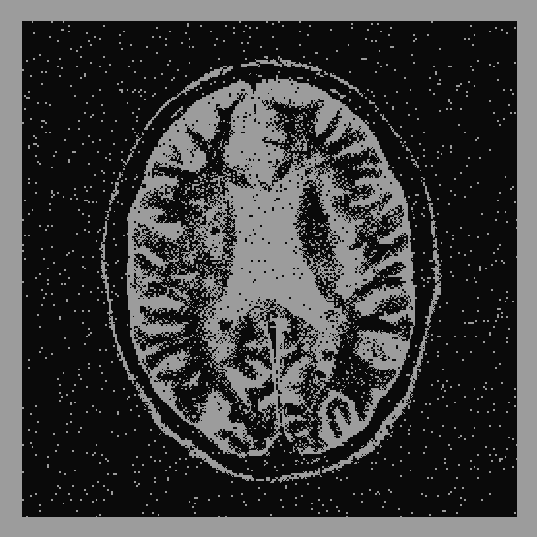

In [ ]:
im_q = img_G.quantize(2)
im_q

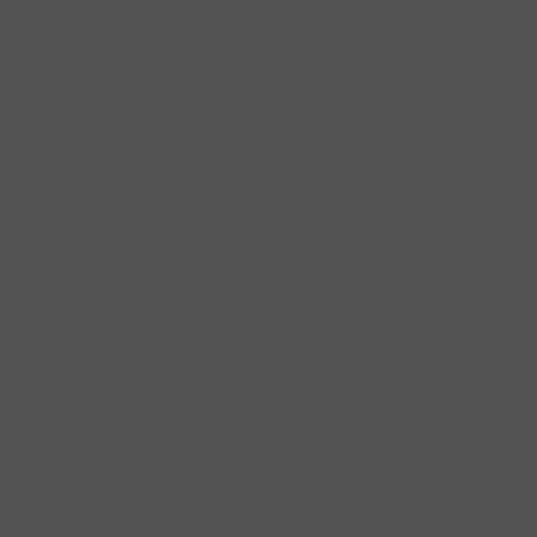

In [ ]:
im_q = img_G.quantize(1)
im_q

Inference: Number of bit tell us the number of color used in particular image:
Like if it is 8 we can see in first image their are multiple color but when it is change into 2 the color present in image is only 2. 


**Q3 Plot the negative of the grayscale image.**


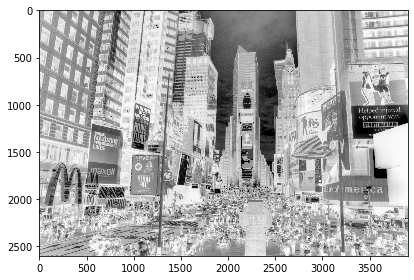

In [ ]:
import cv2
gray = cv2.imread('/content/New_york_times_square-terabass.jpg', 0)
im_neg = abs(255 - gray)
io.imshow(im_neg)

Inference: Image negative is produced by subtracting each pixel from the maximum intensity value. For example in an 8-bit grayscale image, the max intensity value is 255, thus each pixel is subtracted from 255 to produce the output image.


**Q4 Apply a logarithm transform to the grayscale image and display the same.**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
c = 255 / np.log(1 + np.max(gray))
print(c)
log_image1 = c * (np.log(gray + 1))

45.98590442833571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image1, dtype = np.uint8)

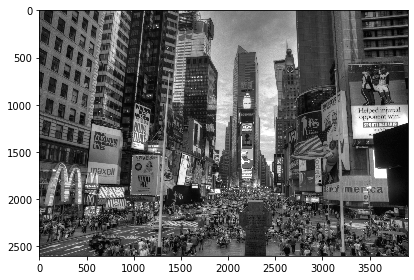

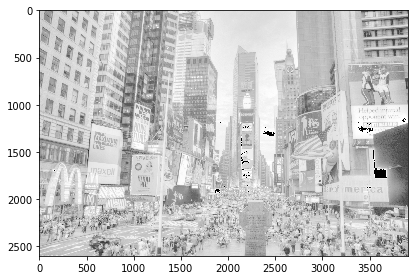

In [ ]:
# Display both images
io.imshow(gray)
plt.show()
io.imshow(log_image)
plt.show()


Inference: log transformation of an image means replacing all pixel values, present in the image, with its logarithmic values. Log transformation is used for image enhancement as it expands dark pixels of the image as compared to higher pixel values.

**Q5 Apply a mean and a median filter of varying sizes to the grayscale images and make observations.**

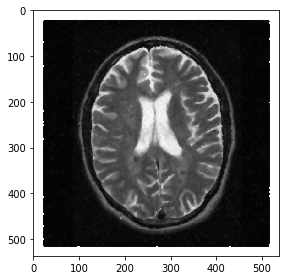

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/1*2I9jCD3ZuQd-SUhC21ra8Q.jpeg')
io.imshow(img)
median = cv2.medianBlur(img, 5)
io.imshow(median)

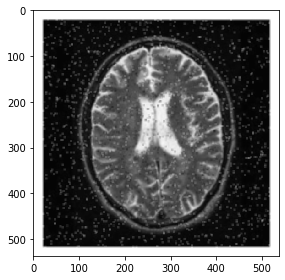

In [ ]:
im1 = cv2.blur(img,(5,5))
io.imshow(im1)

Inference: Like the mean filter, the median filter considers each pixel in the image in turn and looks at its nearby neighbors to decide whether or not it is representative of its surroundings. Instead of simply replacing the pixel value with the mean of neighboring pixel values, it replaces it with the median of those values.


**Apply Laplacian and Sobel filters to the grayscale image.**


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


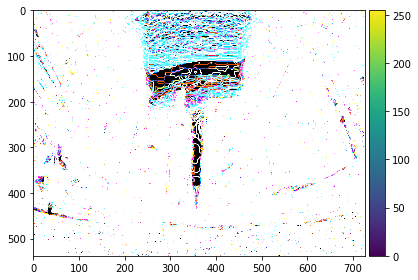

In [ ]:
import numpy
import scipy
from scipy import ndimage
im = median.astype('int32')
dx = ndimage.sobel(im, 1)  # horizontal derivative
dy = ndimage.sobel(im, 0)  # vertical derivative
mag = numpy.hypot(dx, dy)  # magnitude
mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)
io.imshow(mag)


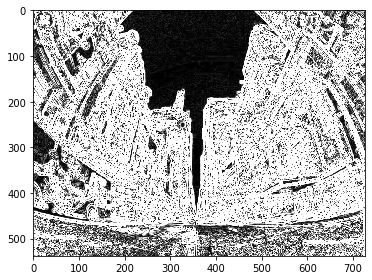

In [ ]:
ddepth = cv.CV_16S
kernel_size = 9
dst = cv.Laplacian(img_G, ddepth, ksize=kernel_size)
abs_dst = cv.convertScaleAbs(dst)
io.imshow(abs_dst)

Inference:
Laplacian filter:
- The Laplacian of an image highlights the areas of rapid changes in intensity and can thus be used for edge detection
- the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass.
Sobel filter:
- It is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes
- The operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical


**Q6 Add salt and pepper noise to the grayscale image. Identify the filter that eliminates the noise.**

In [ ]:
import random
import cv2
def add_noise(img):
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img


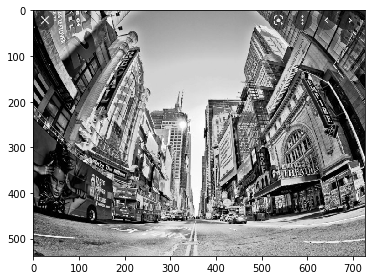

In [ ]:
img = cv2.imread('/content/DIP1.jpg',
                 cv2.IMREAD_GRAYSCALE)
io.imshow(img)

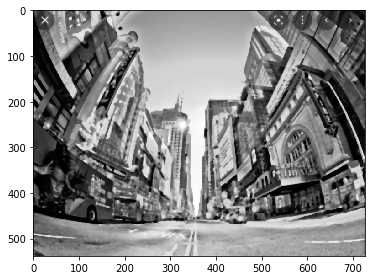

In [ ]:
median = cv2.medianBlur(img, 5)
io.imshow(median)

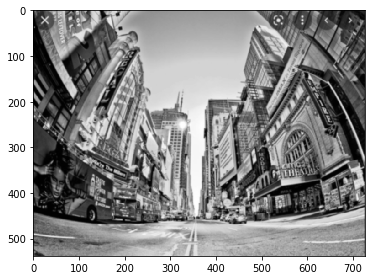

In [ ]:
gauss = cv2.GaussianBlur(img, (5,5), 0)
io.imshow(gauss)

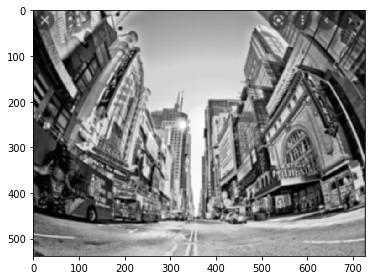

In [ ]:
im1 = cv2.blur(img,(5,5))
io.imshow(im1)

Inference: Salt-and-pepper noise, also known as impulse noise, is a form of noise sometimes seen on digital images. This noise can be caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.
Use the Median Filter block to eliminate the black and white speckles in the image. Use the default parameters. The Median Filter block replaces the central value of the 3-by-3 neighborhood with the median value of the neighborhood. This process removes the noise in the image.
